In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [2]:
DATADIR = 'dataset-resized/'
CATEGORIES = ['trash','plastic']
IMG_SIZE=100

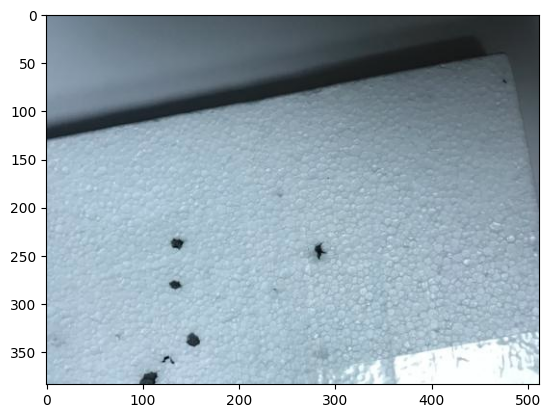

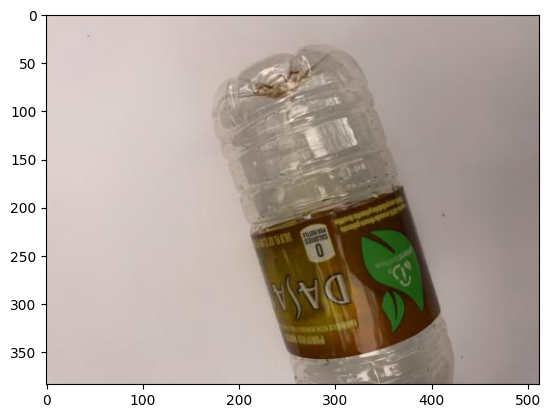

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    #break

trash 0 0
plastic 0 1


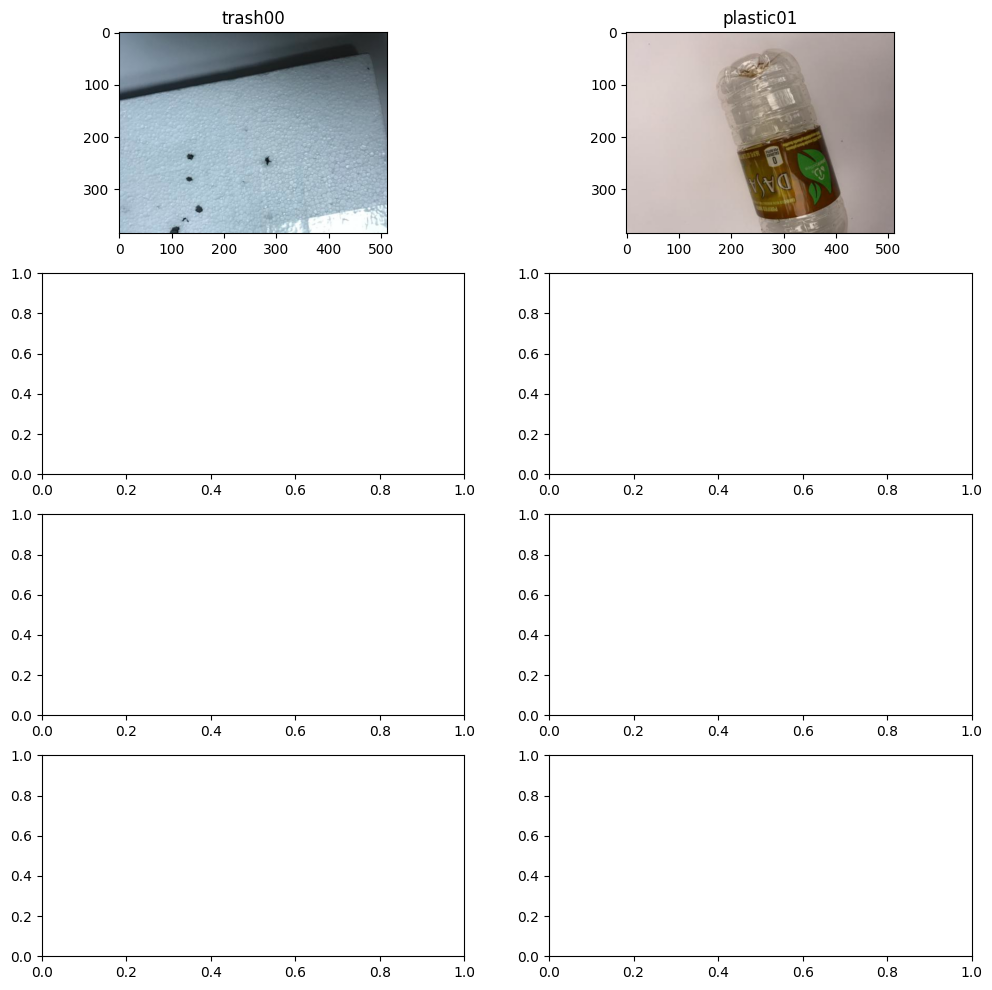

In [4]:
cols=2
rows=4
col_index=0
row_index=0
f, axarr = plt.subplots(rows,cols,figsize=(12, 12))
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        axarr[row_index,col_index].imshow(img_array)
        axarr[row_index,col_index].set_title(category+str(row_index)+str(col_index))
        print(category,row_index,col_index)
        break
    col_index=col_index+1
    if(col_index==cols):
        row_index=row_index+1
        col_index=0

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

In [6]:
print(len(training_data))

619


In [7]:
lenofimage = len(training_data)

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [9]:
X.shape

(619, 30000)

In [10]:
X = X/255.0

In [11]:
X[1]

array([0.7254902 , 0.79215686, 0.84313725, ..., 0.53333333, 0.59215686,
       0.62745098])

In [12]:
y=np.array(y)

In [13]:
y.shape

(619,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [16]:
y2 = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8129032258064516


In [18]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.65      0.56      0.60        39
           1       0.86      0.90      0.88       116

    accuracy                           0.81       155
   macro avg       0.75      0.73      0.74       155
weighted avg       0.81      0.81      0.81       155



In [19]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
150,1,1
151,1,1
152,1,0
153,1,1
